In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import scipy.optimize as so 
from util import simulate_austin
import importlib
import proplot as pplt
import string

In [3]:
importlib.reload(simulate_austin)

<module 'util.simulate_austin' from 'd:\\Thesis\\med_study_MC\\util\\simulate_austin.py'>

## Determine beta0_exp

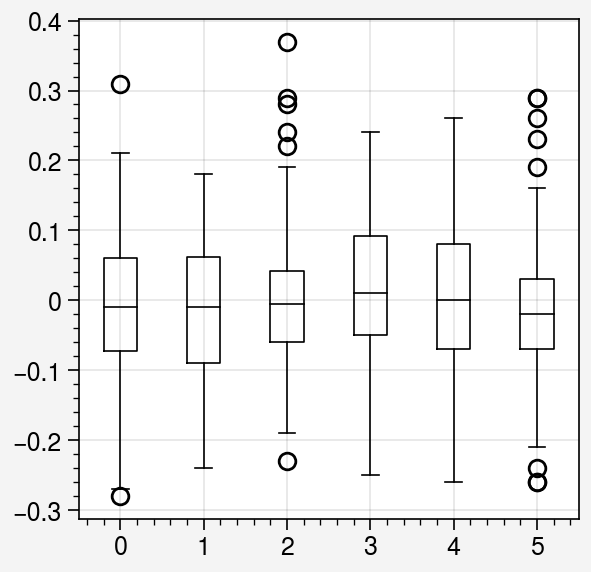

In [16]:
b0_med_ls

[-2.6857233292633964]